In [2]:
import cv2

print(cv2.__version__)

3.4.2


이미지 불러오기

In [6]:
# 이미지를 읽는다
# cv2.IMREAD_COLOR : 읽을 이미지가 칼라이미지로 설정
img = cv2.imread("images.jfif", cv2.IMREAD_COLOR)

# 이미지를 창을 띄워서 출력 (타이틀, 이미지명)
cv2.imshow("figure", img)

# 사용자가 임의의 키를 누를때까지 대기
cv2.waitKey(0)
# 사용자가 임의의 키를 눌렀다면 현재 활성화시킨 윈도우 창들을 닫아줌
cv2.destroyAllWindows()

matplotlib 라이브러리와 연동

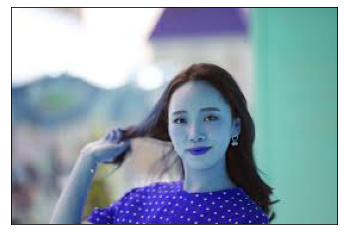

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images.jfif", cv2.IMREAD_COLOR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

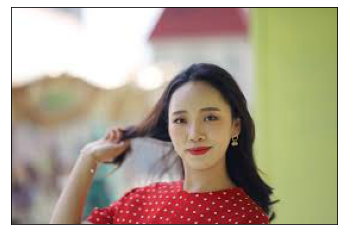

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images.jfif", cv2.IMREAD_COLOR)

# 색상공간을 변환 (RGB -> BGR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

이미지 종류

- Color 이미지 : RGB 색상으로 구성된 이미지
- Gray Scale 이미지 : 0-255 값으로 구성된 흑백이미지
- 이진 이미지 : 0과 1(255) 값으로 구성된 흑백이미지

Text(0.5, 1.0, 'figure')

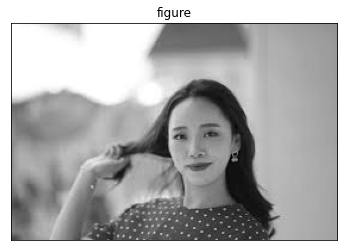

In [12]:
# 칼라이미지를 흑백이미지로 변환해서 출력
import cv2
import matplotlib.pyplot as plt

# 이미지를 흑백이미지로 읽는다
img = cv2.imread("images.jfif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("figure")

Text(0.5, 1.0, 'binary image')

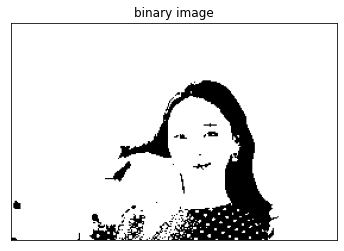

In [21]:
# 이진 이미지
import cv2
import matplotlib.pyplot as plt

# 이미지를 흑백이미지로 읽는다
img = cv2.imread("images.jfif", cv2.IMREAD_GRAYSCALE)

# (이미지명, 기준값, 기준값보다 큰 경우 할당되는 값, 할당 조건)
# cv2.THRESH_BINARY : 픽셀값이 기준값보다 크면 할당값으로 할당하고 아니면 0
# cv2.THRESH_BINARY_INV : 픽셀값이 기준값보다 크면 0, 아니면 할당값 할당

# 이미지 픽셀값 0 (검정색) - 255 (흰색) 값으로 구성
_, thImg = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)

plt.imshow(thImg, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("binary image")

카메라영상, 동영상 불러오기

In [5]:
import cv2

try :
    print("동영상을 가져옵니다")
    # 동영상 파일
    cap = cv2.VideoCapture("cctv01.mp4")
    
    # 직접 카메라를 연결하는 경우 : 카메라 번호 설정
    #cap = cv2.VideoCapture(0)
    
except :
    print("동영상 가져오기 실패")
    
# 동영상 크기
cap.set(3, 480)   # 가로 크기
cap.set(4, 320)   # 세로 크기

while True :
    # 동영상에서 이미지를 한 장씩 읽어온다
    ret, frame = cap.read()
    
    # 만약 이미지를 읽지 못하면 ret가 False가 넘어옴
    if not ret :
        print("이미지 읽기 실패")
        cap.release()     # 비디오 객체 종료
        cv2.destroyAllWindows()   # 윈도우 창 닫기
        break
        
    # 이미지를 읽었다면
    cv2.imshow("video", frame)
    
    # 0.033초 동안 키입력을 대기 (1초에 30번)
    # 일반적으로 동영상은 초당 30장의 이미지로 구성
    # 입력된 키값을 k에 저장
    k = cv2.waitKey(33)
    
    # 숫자 1을 누르면 비디오를 종료하고 윈도우 창을 닫음
    if k == 49 :   # 숫자 1에 해당하는 ASCII 코드 값
        cap.release()     # 비디오 객체 종료
        cv2.destroyAllWindows()   # 윈도우 창 닫기
        break 

동영상을 가져옵니다


동영상 녹화하기

In [2]:
import cv2

try :
    print("카메라 구동 시작")
    cap = cv2.VideoCapture(0)
# 예외 발생 시 처리
except:
    print("카메라 구동 실패")
    
# 녹화 설정
fps = 30.0      # 녹화할 프레임 수
width = int(cap.get(3))    # 녹화할 영상의 가로 크기
height = int(cap.get(4))   # 녹화할 영상의 세로 크기

# 코덱설정 -> MPEG
#fcc = cv2.VideoWriter_fourcc(*"MPEG") 
fcc = cv2.VideoWriter_fourcc(*"DIVX")    # AVI

# 녹화 설정 적용 (파일명, 코덱, 프레임수, 크기)
#out = cv2.VideoWriter("cctv01.mp4", fcc, fps, (width, height))
out = cv2.VideoWriter("cctv01.avi", fcc, fps, (width, height))
print("녹화를 시작합니다")

record = False

# 카메라로부터 동영상 프레임을 계속 읽어옴
while True:
    # 한 프레임씩 읽어서 frame에 저장하고 성공여부를 ret에 저장
    # 성공 ret는 True, 실패 ret는 False
    ret, frame = cap.read()
    
    # 프레임 읽기 실패한 경우
    if not ret :
        print("프레임 읽기 실패")
        cap.release()   # 카메라 해제
        cv2.destroyAllWindows()
        break
        
    # 프레임을 읽기 성공한 경우 동영상 저장
    cv2.imshow("cctv", frame)
    
    # 초당 30장의 프레임이 실행되도록 설정
    # 사용자 키 입력 받기를 대기
    k = cv2.waitKey(33)
    
    if k == 49 :   # 숫자 1이라면
        print("녹화를 종료합니다")
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break
        
    # 숫자 2를 누르면 녹화가 시작되도록        
    elif k == 50 :
        record = True

    if record == True :
        out.write(frame)

카메라 구동 시작
녹화를 시작합니다
녹화를 종료합니다


비디오에서 이미지 한프레임만 저장

In [3]:
import cv2

try :
    print("카메라 구동")
    cap = cv2.VideoCapture("cctv01.mp4")
except :
    print("카메라 구동 실패")
    
# 파일에 순서 번호를 저장
co = 0

while True :
    ret, frame = cap.read()
    
    if not ret :
        print("비디오 캡처 실패")
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("cctv", frame)        
    
    k = cv2.waitKey(33)
    
    if k == 49 :
        cap.release()
        cv2.destroyAllWindows()
        break  
        
    # 숫자 2를 누르면 현재 프레임을 test1.png, test2.png..... 형태로 저장        
    elif k == 50 :
        co = co + 1
        print("test{}.png".format(co))
        # (파일명, 저장할 프레임, params=[압축여부, 압축단계])
        # 압축단계 : 0-9 (큰값일수록 많이 압축)
        cv2.imwrite("test{}.png".format(co), frame, 
                   params=[cv2.IMWRITE_PNG_COMPRESSION, 0])        

카메라 구동
test1.png
test2.png
test3.png


이미지 처리 방법

- 픽셀 기반 처리
  - 픽셀(pixel) : 이미지를 구성하는 가장 작은 요소 (0-255 사이 값을 가짐)
- 블록 기반 처리
  - 블록 (block) : 픽셀을 가로/세로 일정 크기로 잘라논 ROI 이미지
- 주파수 기반 처리 
  - 픽셀 값들간 차이 (주파수)를 기반으로 이미지를 처리하는 방법

픽셀 기반 처리

In [5]:
# 픽셀값 읽기
import cv2

img = cv2.imread("images.jfif")

px = img[100, 100]    # 100, 100 위치의 픽셀값을 출력
px

# blue, green, red

array([153, 156, 170], dtype=uint8)

In [9]:
# 픽셀값 변경
img[100, 100] = [0, 0, 255]
img[100, 101] = [0, 0, 255]
img[101, 100] = [0, 0, 255]
img[101, 101] = [0, 0, 255]

cv2.imshow("pixel", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 이미지의 속성 출력
print(img.shape)   # 이미지 크기
print(img.size)    # 이미지 픽셀의 수 (세로, 가로)
print(img.dtype)   # 픽셀 값의 타입 (0-255)

(183, 275, 3)
150975
uint8


In [12]:
# ROI (Region of Image : 이미지 영역) 자르기
cv2.imshow("original", img)

roiImg = img[60:130, 130:180]

cv2.imshow("roi", roiImg)

cv2.waitKey(0)
cv2.destroyAllWindows()

이미지에 도형 그리기
- cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께) : 직선 그리기 함수
- cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께) : 원 그리기 함수
- cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께) : 사각형 그리기 함수
- cv2.ellipse(배경이미지, 중심좌표, 장축/단축길이, 호의시작각, 호의 종료각, 색상, 선두께) : 타원 그리기 함수
- cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기) : 텍스트 입력 함수

In [2]:
import cv2

img = cv2.imread("images.jfif")

# 행과 열 => 가로와 세로 변환
img = cv2.rectangle(img, (130, 60), (180, 130), (0, 0, 255), 3)

img = cv2.putText(img, "Woman", (130, 50), cv2.FONT_HERSHEY_SIMPLEX,
                 0.5, (255, 0, 0), 2)

cv2.imshow("rect", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np

# 한글 출력
img = cv2.imread("images.jfif")

# 행과 열 => 가로와 세로 변환
img = cv2.rectangle(img, (130, 60), (180, 130), (0, 0, 255), 3)

# 폰트 종류와 크기
font = ImageFont.truetype("08SeoulNamsanB.ttf", 20)

# 파이썬에 편집할 수 있는 이미지로 변환
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)
# 출력시작좌표, 출력내용, 폰트, 색상
draw.text((130, 40), "여성", font=font, fill=(255, 0, 0, 0))

# 이미지을 넘파이 배열로 변환
img = np.array(img_pil)

cv2.imshow("rect", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

HSV 색상공간을 이용해서 원하는 색상만 추출하기

In [1]:
import cv2
import numpy as np

img = cv2.imread("balloon.jpg")
cv2.imshow("original", img)

# BGR 색상을 HSV 색상으로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 색상의 범위 
# H (색상) : -180-180
# S (채도) : 0 - 255
# V (명도) : 0 - 255

# 빨간색 영역
# 최소값
lower = np.array([-10, 100, 100])
# 최대값
upper = np.array([10, 255, 255])

# 최소값과 최대값에 해당되는 범위를 마스크로 생성
mask = cv2.inRange(hsv, lower, upper)
# 마스크에 포함된 이미지 픽셀값만을 (마스크와 이미지를 AND 연산) 이미지에 표시
img2 = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("red balloon", img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

녹색, 노란색, 파란색 풍선도 잘라내보세요

### 침식과 팽창

- 이진이미지 처리 방법
- Erosion (침식) : 이미지 경계부분에서 1을 0으로 변환하는 방법
- Dilation (팽창) : 이미지 경계부분에서 0을 1로 변환하는 방법
- iterations : 변환을 몇 번 할 것인지 설정

In [2]:
import cv2
import numpy as np

# 흑백 이미지로 읽기 (cv2.IMREAD_GRAYSCALE)
img = cv2.imread("number.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("orginal", img)

# 침식과 팽창의 크기를 설정
kernel = np.ones((3, 3), np.uint8)

# 침식
erosion = cv2.erode(img, kernel, iterations=1)

cv2.imshow("erosion", erosion)

# 팽창
dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow("dilation", dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()

침식과 팽창을 이용해서 솔트 잡음을 제거
- Opening : 침식 후에 팽창 연산을 수행 (검정 배경에 흰색 잡음이 있는 경우) 
- Closing : 팽창 후에 침식 연산을 수행 (흰색 글씨에 검정색 잡음이 있는 경우)

In [2]:
import cv2
import numpy as np

img = cv2.imread("noise_A.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("original", img)

# Opening
kernel = np.ones((5,5), np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow("opening", opening)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np

img = cv2.imread("noise_B.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("original", img)

# closing
kernel = np.ones((5,5), np.uint8)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow("closing", closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

이미지 특성 추출 - 에지, 윤곽선

- Edge : 이미지의 경계 부분 (고주파 부분)
- Contour : 에지부분을 폐곡선으로 만든 특성

Canny 에지 추출기

In [5]:
import cv2

img = cv2.imread("images.jfif", cv2.IMREAD_GRAYSCALE)

# 이미지, 픽셀의 최소값, 최대값
edge = cv2.Canny(img, 50, 200)

edge = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 히스토그램 그리기

- 이미지 포함된 픽셀값들이 몇 개씩 분포되어 있는지를 그래프화 한 것

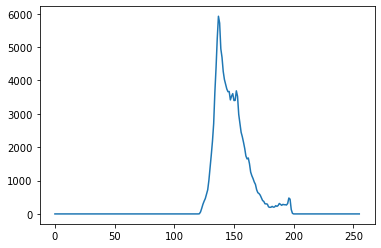

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("histogram.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("original", img)

# 이미지, 채널 (흑백0, 칼라 : Blue(0), Green(1), Red(2)), 마스크영역, 색상의 수,
# 픽셀값의 범위
hist = cv2.calcHist([img], [0], None, [256], [0, 255])

plt.plot(hist)

cv2.waitKey(0)
cv2.destroyAllWindows()

히스토그램 균일화 (평활화) 

- 히스토그램 분포가 전체 픽셀에 대해 골고루 분포가 되도록 만드는 것 (정규화)
- 흐릿한 이미지를 선명하게 변경할 수 있음

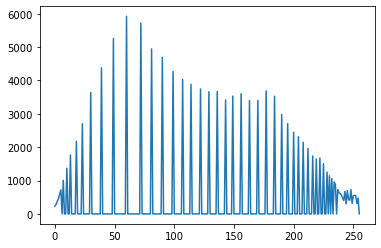

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("histogram.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("original", img)

# 히스토그램 평활화
img2 = cv2.equalizeHist(img)

cv2.imshow("equalize", img2)

# 이미지, 채널 (흑백0, 칼라 : Blue(0), Green(1), Red(2)), 마스크영역, 색상의 수,
# 픽셀값의 범위
hist = cv2.calcHist([img2], [0], None, [256], [0, 255])

plt.plot(hist)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 템플릿 매칭

- 큰 이미지 내에 작은 이미지 (템플릿)가 있는 위치를 검색

In [14]:
import cv2
import numpy as np

img1 = cv2.imread("game.png")
img2 = cv2.imread("game_cut.png", cv2.IMREAD_GRAYSCALE)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 템플릿 이미지의 크기 계산
h, w = img2.shape

# 템플릿 매칭
# cv2.TM_CCOEFF_NORMED : 매칭 방법
res = cv2.matchTemplate(img1_gray, img2, cv2.TM_CCOEFF_NORMED)

# 매칭도가 기준값 이상인 위치만 가져온다
loc = np.where(res >= 0.7)

# [::-1] : 첫번째 인덱스의 값와 두 번째 인덱스값을 서로 바꿈
# height, width -> x, y
for pt in zip(*loc[::-1]) :
    cv2.rectangle(img1, pt, (pt[0]+w, pt[1]+h), (0, 0, 255), 2)

cv2.imshow("match", img1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
import numpy as np

a = np.arange(10)   #0-9수를 배열로 만듬
 
loc = np.where(a > 5)  # 배열값 중에서 5보다 큰 값을 loc 저장

loc

(array([6, 7, 8, 9], dtype=int64),)

In [24]:
# zip() : 2개 이상의 리스트나 튜플에서 동일 위치의 인덱스 값들끼리 묶어서
# 튜플로 반환하는 기능
y = [1, 2, 3, 4]
x = [5, 6, 7, 8]

a = zip(y, x)

for pt in a :
    print(pt)

(1, 5)
(2, 6)
(3, 7)
(4, 8)


In [26]:
# [::-1] : 서로 위치를 맞바꾸는것
# * : 함수의 매개변수의 수가 정해져 있지 않는 경우에 사용
loc = (np.array([1, 2, 3, 4]), np.array([5, 6, 7, 8]))

for pt in zip(*loc[::-1]) :
    print(pt)

(5, 1)
(6, 2)
(7, 3)
(8, 4)


In [31]:
# * : 함수의 매개변수의 수가 정해져 있지 않는 경우에 사용
def add(*num) :
    return np.sum(num)

print(add(2, 3))
print(add(2, 3, 5))
print(add(2, 3, 4, 4, 10))

5
10
23


Hough 변환을 이용해서 이미지에 원을 찾기

In [33]:
import cv2
import numpy as np

img = cv2.imread("signal_light.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 허프 변환으로 원 찾기
# (이미지, 검색방법, 원의 중심점간의 최소거리, ?,
# param1=Canny 연산자의 최대값, param2=카운트값(작으면 많은 원을 찾음),
# minRadius=원의 최소 반지름", maxRadius =원의 최대 반지름)
circle = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 10, 
                         param1=60,
                         param2=50,
                         minRadius=10,
                         maxRadius=100)

# 원이 검색되었다면
if circle is not None:
    # 반올림 (중심좌표X, Y, 반지름)
    circle = np.uint16(np.around(circle))
    
    # 검색된 원을 그려준다
    for i in circle[0, :] :
        cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 4)
        
    cv2.imshow("circle", img)        
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else :
    print("원이 없습니다")    